In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

In [ ]:
li_data = pd.read_csv('LI-Small_Trans.csv')

In [ ]:
li_data.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:08,11,8000ECA90,11,8000ECA90,3195403.00,US Dollar,3195403.00,US Dollar,Reinvestment,0
1,2022/09/01 00:21,3402,80021DAD0,3402,80021DAD0,1858.96,US Dollar,1858.96,US Dollar,Reinvestment,0
2,2022/09/01 00:00,11,8000ECA90,1120,8006AA910,592571.00,US Dollar,592571.00,US Dollar,Cheque,0
3,2022/09/01 00:16,3814,8006AD080,3814,8006AD080,12.32,US Dollar,12.32,US Dollar,Reinvestment,0
4,2022/09/01 00:00,20,8006AD530,20,8006AD530,2941.56,US Dollar,2941.56,US Dollar,Reinvestment,0


In [ ]:
li_data.tail()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
6924044,2022/09/10 23:39,71696,81B2518F1,71528,81C0482E1,0.033469,Bitcoin,0.033469,Bitcoin,Bitcoin,0
6924045,2022/09/10 23:48,271241,81B567481,173457,81C0DA751,0.001313,Bitcoin,0.001313,Bitcoin,Bitcoin,0
6924046,2022/09/10 23:50,271241,81B567481,173457,81C0DA751,0.013058,Bitcoin,0.013058,Bitcoin,Bitcoin,0
6924047,2022/09/10 23:57,170558,81A2206B1,275798,81C1D5CA1,0.414537,Bitcoin,0.414537,Bitcoin,Bitcoin,0
6924048,2022/09/10 23:31,170558,81A2206B1,275798,81C1D5CA1,0.034277,Bitcoin,0.034277,Bitcoin,Bitcoin,0


In [ ]:
li_data.notnull().sum()

Timestamp             6924049
From Bank             6924049
Account               6924049
To Bank               6924049
Account.1             6924049
Amount Received       6924049
Receiving Currency    6924049
Amount Paid           6924049
Payment Currency      6924049
Payment Format        6924049
Is Laundering         6924049
dtype: int64

In [ ]:
li_data.isnull().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [ ]:
li_data.keys()

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

In [ ]:
li_data.dtypes

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

In [ ]:
li_data.shape

(6924049, 11)

In [ ]:
li_data['Timestamp'].describe()

count              6924049
unique               14533
top       2022/09/01 00:22
freq                 15221
Name: Timestamp, dtype: object

/home/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


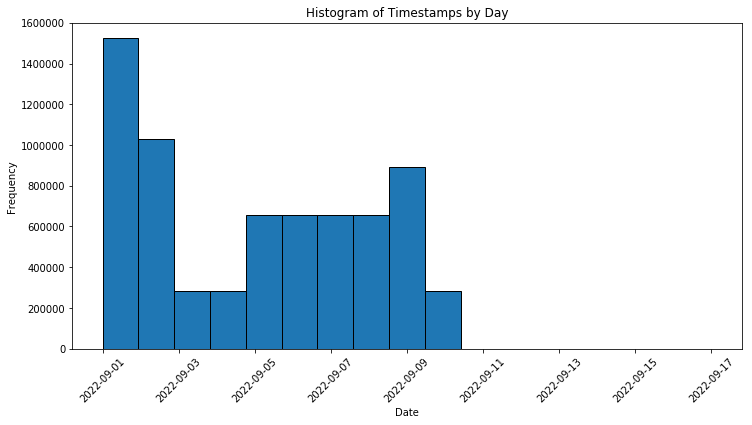

In [ ]:
# Converting the attribute into datetime dtype
Timestamp = pd.to_datetime(li_data['Timestamp'])


# Extract the days from the timestamps
days_transactions = Timestamp.dt.floor('D')


# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(days_transactions, bins=len(days_transactions.unique()), edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Timestamps by Day')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Set the display format to avoid scientific notation
pd.options.display.float_format = '{:.0f}'.format
li_data['From Bank'].describe()

count   6924049
mean      59387
std       90517
min           0
25%         219
50%       14195
75%      110682
max      376967
Name: From Bank, dtype: float64

In [ ]:
# Converting datatype float to str for 'FROM BANK' numbers
li_data['From Bank']= li_data['From Bank'].astype(str)

In [ ]:
li_data['From Bank'].describe()

count     6924049
unique      41814
top            70
freq       609991
Name: From Bank, dtype: object

Text(0.5, 1.0, 'Top 25 Bank SENDER by Frequency of Transactions')

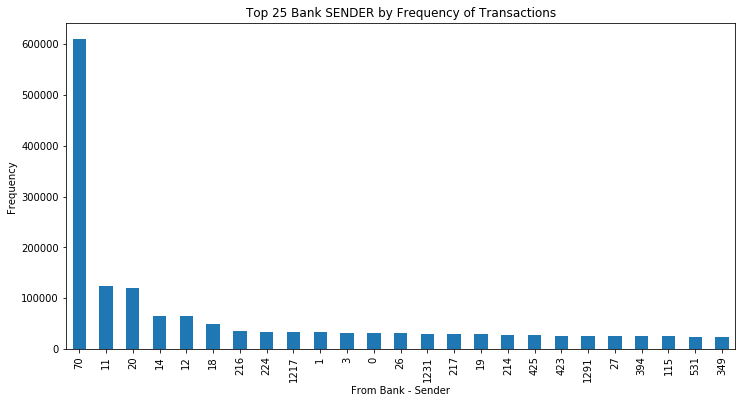

In [ ]:
# Visualising the Top 25 Sender's Bank by Frequency of Transactions

plt.figure(figsize=(12, 6))
li_data['From Bank'].value_counts().head(25).plot(kind='bar')

# Label the axes and add a title
plt.xlabel('From Bank - Sender')
plt.ylabel('Frequency')
plt.title('Top 25 Bank SENDER by Frequency of Transactions')


In [ ]:
# Converting datatype float to str for 'TO BANK' numbers
li_data['To Bank'] = li_data['To Bank'].astype(str)
li_data['To Bank'].describe()

count     6924049
unique      21588
top            11
freq        66055
Name: To Bank, dtype: object

Text(0.5, 1.0, 'Top 25 Bank Beneficary by Frequency of Transactions')

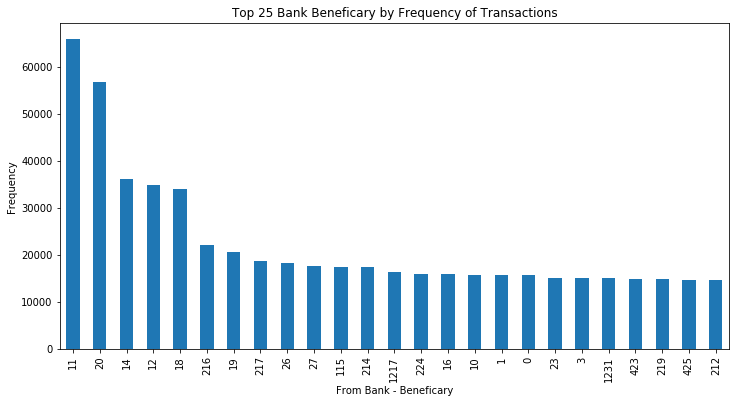

In [ ]:
# Visualising the Top 25 Beneficary Bank by Frequency of Transactions

plt.figure(figsize=(12, 6))
li_data['To Bank'].value_counts().head(25).plot(kind='bar')

# Label the axes and add a title
plt.xlabel('From Bank - Beneficary')
plt.ylabel('Frequency')
plt.title('Top 25 Bank Beneficary by Frequency of Transactions')

In [ ]:
# Sender's Account Number
li_data['Account'].describe()

count       6924049
unique       681281
top       10042B660
freq         222037
Name: Account, dtype: object

Text(0.5, 1.0, 'Top 25 Accounts by Frequency of Transactions')

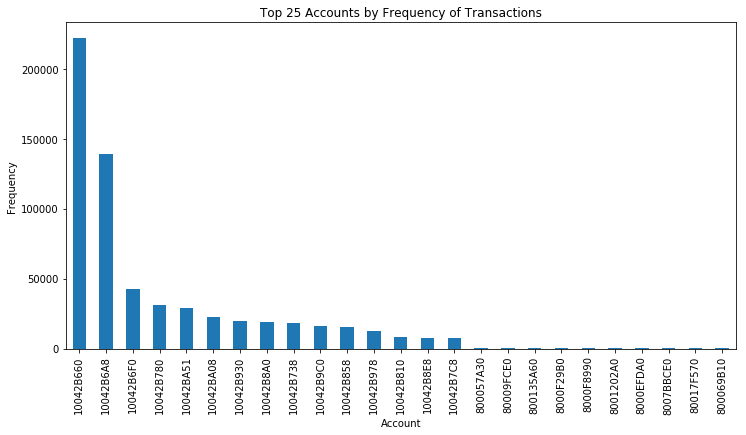

In [ ]:
# Visualising the Top 25 Accounts by Frequency of Transactions

plt.figure(figsize=(12, 6))
li_data['Account'].value_counts().head(25).plot(kind='bar')

# Label the axes and add a title
plt.xlabel('Account')
plt.ylabel('Frequency')
plt.title('Top 25 Accounts by Frequency of Transactions')

In [ ]:
# Beneficary's Account Number
li_data['Account.1'].describe()

count       6924049
unique       576176
top       10042B660
freq           1553
Name: Account.1, dtype: object

Text(0.5, 1.0, 'Top 25 Receiver Accounts by Frequency of Transactions')

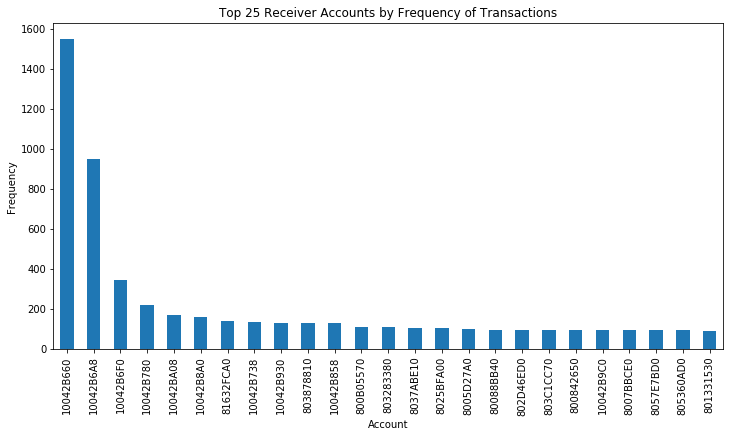

In [ ]:
# Visualising the Top 25 Reciever Accounts by Frequency of Transactions

plt.figure(figsize=(12, 6))
li_data['Account.1'].value_counts().head(25).plot(kind='bar')

# Label the axes and add a title
plt.xlabel('Account')
plt.ylabel('Frequency')
plt.title('Top 25 Receiver Accounts by Frequency of Transactions')

In [ ]:
# Set the display format to avoid scientific notation
pd.options.display.float_format = '{:.0f}'.format
li_data['Amount Received'].describe()

count         6924049
mean          6324067
std        2105371140
min                 0
25%               174
50%              1398
75%             12296
max     3644853662747
Name: Amount Received, dtype: float64

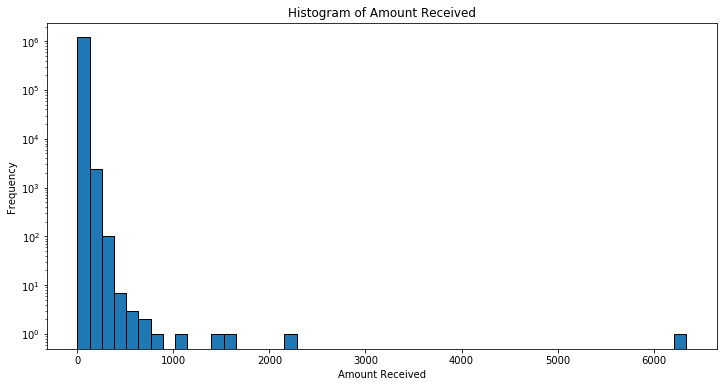

In [ ]:
#Visualisation
plt.figure(figsize=(12, 6))
li_data['Amount Received'].value_counts().plot(kind ='hist', bins = 50, edgecolor='black', log=True)

# Label the axes and add a title
plt.xlabel('Amount Received')
plt.ylabel('Frequency')
plt.title('Histogram of Amount Received')

# Display the plot
plt.show()


In [ ]:
li_data.keys()

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

In [ ]:
li_data.isnull().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [ ]:
li_data['Receiving Currency'].describe()

count       6924049
unique           15
top       US Dollar
freq        2537242
Name: Receiving Currency, dtype: object

In [ ]:
li_data['Receiving Currency'].value_counts()

US Dollar            2537242
Euro                 1596407
Yuan                  474978
Rupee                 344237
Bitcoin               313196
Saudi Riyal           261882
Australian Dollar     213905
Yen                   211631
Brazil Real           202717
Canadian Dollar       177966
Shekel                177298
Swiss Franc           140076
UK Pound               98000
Ruble                  89140
Mexican Peso           85374
Name: Receiving Currency, dtype: int64

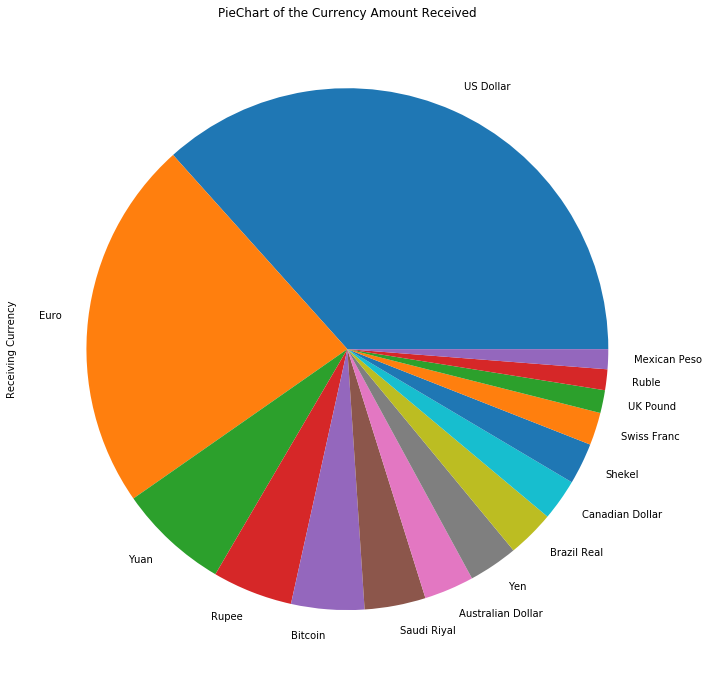

In [ ]:
# Visualising the Value Counts
plt.figure(figsize=(14, 12))
li_data['Receiving Currency'].value_counts().plot(kind = 'pie')

# Label the axes and add a title

plt.title('PieChart of the Currency Amount Received')

# Adding a legend outside the plot

# Display the plot
plt.show()

In [ ]:
# Set the display format to avoid scientific notation
pd.options.display.float_format = '{:.0f}'.format
li_data['Amount Paid'].describe()

count         6924049
mean          4676036
std        1544098507
min                 0
25%               175
50%              1399
75%             12227
max     3644853662747
Name: Amount Paid, dtype: float64

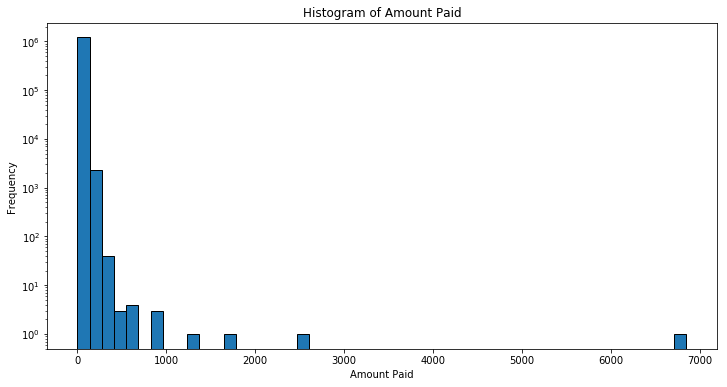

In [ ]:
#Visualisation
plt.figure(figsize=(12, 6))
li_data['Amount Paid'].value_counts().plot(kind ='hist', bins = 50, edgecolor='black', log=True)

# Label the axes and add a title
plt.xlabel('Amount Paid')
plt.ylabel('Frequency')
plt.title('Histogram of Amount Paid')

# Display the plot
plt.show()


In [ ]:
li_data['Payment Currency'].describe()

count       6924049
unique           15
top       US Dollar
freq        2553887
Name: Payment Currency, dtype: object

In [ ]:
li_data['Payment Currency'].value_counts()

US Dollar            2553887
Euro                 1595859
Yuan                  483603
Rupee                 340641
Bitcoin               309240
Saudi Riyal           257948
Australian Dollar     211155
Yen                   210125
Brazil Real           199840
Canadian Dollar       176069
Shekel                174530
Swiss Franc           138251
UK Pound               99668
Ruble                  88492
Mexican Peso           84741
Name: Payment Currency, dtype: int64

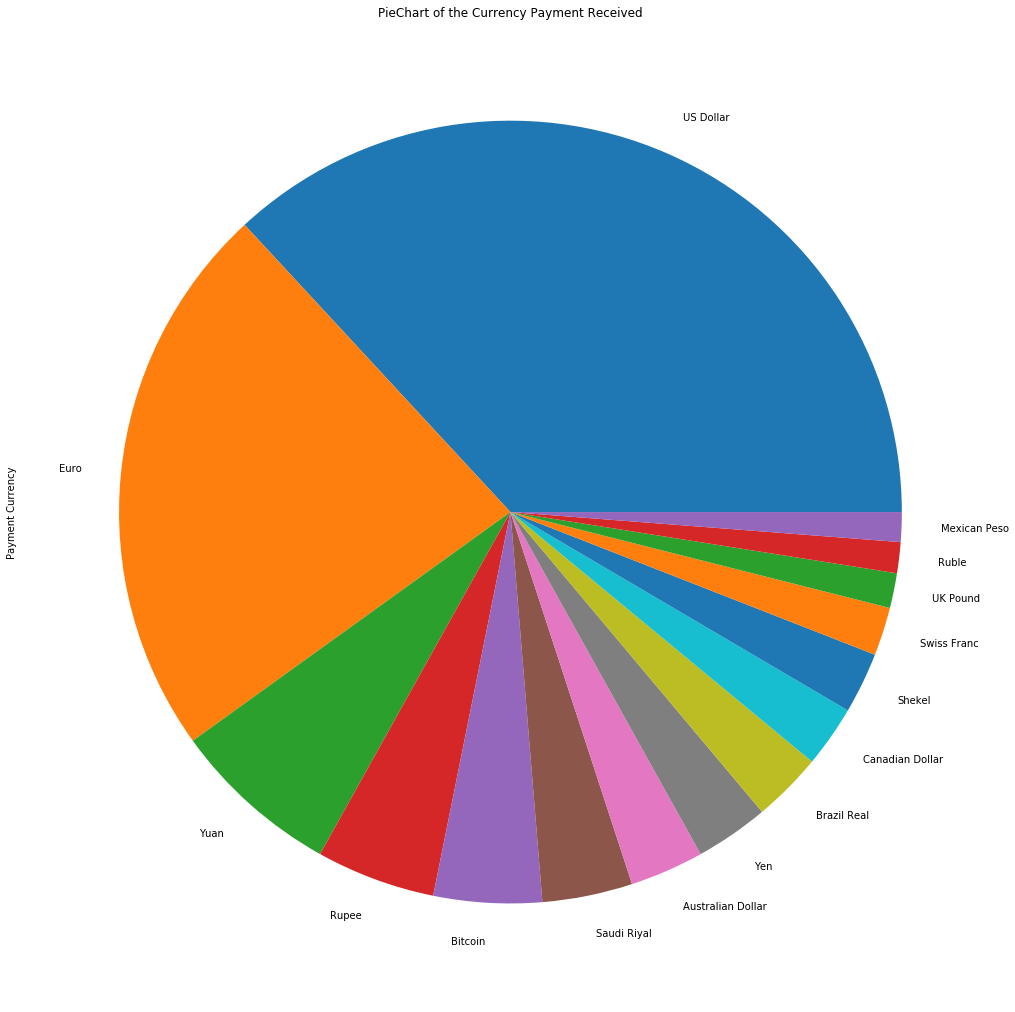

In [ ]:
# Visualising the Value Counts
plt.figure(figsize=(20, 18))
li_data['Payment Currency'].value_counts().plot(kind = 'pie')

# Label the axes and add a title

plt.title('PieChart of the Currency Payment Received')

# Adding a legend outside the plot

# Display the plot
plt.show()

In [ ]:
# 'Payment Format', 'Is Laundering'
li_data['Payment Format'].describe()

count     6924049
unique          7
top        Cheque
freq      2503158
Name: Payment Format, dtype: object

In [ ]:
li_data['Payment Format'].value_counts()

Cheque          2503158
Credit Card     1780389
ACH              796581
Cash             655688
Reinvestment     650458
Bitcoin          309208
Wire             228567
Name: Payment Format, dtype: int64

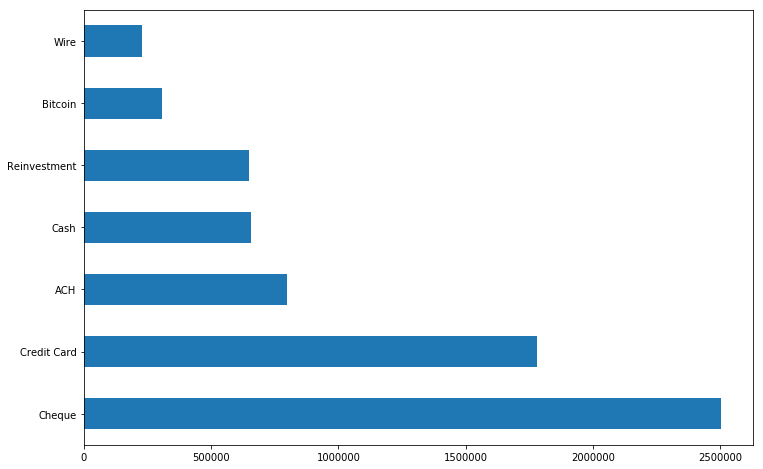

In [ ]:
plt.figure(figsize=(12, 8))
li_data['Payment Format'].value_counts().plot(kind ='barh')

In [ ]:
li_data['Is Laundering'].describe()

count   6924049
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max           1
Name: Is Laundering, dtype: float64

In [ ]:
li_data['Is Laundering'].value_counts()

0    6920484
1       3565
Name: Is Laundering, dtype: int64

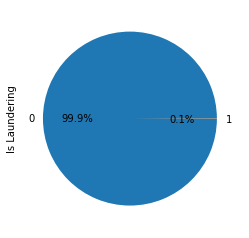

In [ ]:
li_data['Is Laundering'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')

In [ ]:
li_data.dtypes

Timestamp              object
From Bank              object
Account                object
To Bank                object
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

In [ ]:
# Extracting the Date Features for Normalisation

li_data['Year'] = Timestamp.dt.year
li_data['Month'] = Timestamp.dt.month
li_data['Day'] = Timestamp.dt.day
li_data['DayOfWeek'] = Timestamp.dt.dayofweek
li_data['Hour'] = Timestamp.dt.hour

In [ ]:
li_data.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Year,Month,Day,DayOfWeek,Hour
0,2022/09/01 00:08,11,8000ECA90,11,8000ECA90,3195403,US Dollar,3195403,US Dollar,Reinvestment,0,2022,9,1,3,0
1,2022/09/01 00:21,3402,80021DAD0,3402,80021DAD0,1859,US Dollar,1859,US Dollar,Reinvestment,0,2022,9,1,3,0
2,2022/09/01 00:00,11,8000ECA90,1120,8006AA910,592571,US Dollar,592571,US Dollar,Cheque,0,2022,9,1,3,0
3,2022/09/01 00:16,3814,8006AD080,3814,8006AD080,12,US Dollar,12,US Dollar,Reinvestment,0,2022,9,1,3,0
4,2022/09/01 00:00,20,8006AD530,20,8006AD530,2942,US Dollar,2942,US Dollar,Reinvestment,0,2022,9,1,3,0


In [ ]:
li_data['Year'].value_counts()

2022    6924049
Name: Year, dtype: int64

In [ ]:
li_data['Month'].value_counts()

9    6924049
Name: Month, dtype: int64

In [ ]:
li_data['Day'].value_counts()

1     1524807
2     1027758
9      891573
7      658504
8      657938
5      657397
6      657170
3      283326
10     282877
4      282476
11         77
13         48
12         48
14         31
15          9
16          7
17          3
Name: Day, dtype: int64

In [ ]:
li_data['DayOfWeek'].value_counts()

3    2182754
4    1919338
2     658535
0     657445
1     657218
5     566206
6     282553
Name: DayOfWeek, dtype: int64

In [ ]:
li_data['Hour'].value_counts()

0     869004
21    264503
6     264470
16    264377
19    264377
10    264151
18    264115
23    263940
3     263920
22    263769
1     263400
13    263386
5     263368
17    263146
9     262994
15    262818
12    262710
4     262577
11    262395
20    262394
7     262195
14    262186
8     262157
2     261697
Name: Hour, dtype: int64

In [ ]:
selected_columns = ['Day','DayOfWeek','Hour', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering']

li_data[selected_columns].head()

,Day,DayOfWeek,Hour,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,1,3,0,11,8000ECA90,11,8000ECA90,3195403,US Dollar,3195403,US Dollar,Reinvestment,0
1,1,3,0,3402,80021DAD0,3402,80021DAD0,1859,US Dollar,1859,US Dollar,Reinvestment,0
2,1,3,0,11,8000ECA90,1120,8006AA910,592571,US Dollar,592571,US Dollar,Cheque,0
3,1,3,0,3814,8006AD080,3814,8006AD080,12,US Dollar,12,US Dollar,Reinvestment,0
4,1,3,0,20,8006AD530,20,8006AD530,2942,US Dollar,2942,US Dollar,Reinvestment,0


In [ ]:
li_data[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924049 entries, 0 to 6924048
Data columns (total 13 columns):
Day                   int64
DayOfWeek             int64
Hour                  int64
From Bank             object
Account               object
To Bank               object
Account.1             object
Amount Received       float64
Receiving Currency    object
Amount Paid           float64
Payment Currency      object
Payment Format        object
Is Laundering         int64
dtypes: float64(2), int64(4), object(7)
memory usage: 686.7+ MB


## Normalisation of the Dataset

In [ ]:
# Converting Categorical Data into numercial data
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

columns_to_encode = ['From Bank','Account', 'To Bank', 'Account.1', 'Receiving Currency', 'Payment Currency','Payment Format']

for column in columns_to_encode:
    li_data[column] = LE.fit_transform(li_data[column])

In [ ]:
li_data[selected_columns].head()

,Day,DayOfWeek,Hour,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,1,3,0,12,950,12,900,3195403,12,3195403,12,5,0
1,1,3,0,19417,2772,10968,2446,1859,12,1859,12,5,0
2,1,3,0,12,950,36,8407,592571,12,592571,12,3,0
3,1,3,0,40281,9998,20531,8419,12,12,12,12,5,0
4,1,3,0,901,10001,901,8422,2942,12,2942,12,5,0


In [ ]:
# Normalising Data using MinMaxScaler

scaler = MinMaxScaler()

norm_data = scaler.fit_transform(li_data[selected_columns])
print(norm_data)

[[0.         0.5        0.         ... 0.85714286 0.83333333 0.        ]
 [0.         0.5        0.         ... 0.85714286 0.83333333 0.        ]
 [0.         0.5        0.         ... 0.85714286 0.5        0.        ]
 ...
 [0.5625     0.83333333 1.         ... 0.07142857 0.16666667 0.        ]
 [0.5625     0.83333333 1.         ... 0.07142857 0.16666667 0.        ]
 [0.5625     0.83333333 1.         ... 0.07142857 0.16666667 0.        ]]


In [ ]:
# Create a DataFrame from the normalised data

norm_li_st = pd.DataFrame(norm_data, columns = selected_columns)
norm_li_st.head()

,Day,DayOfWeek,Hour,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,0.0,0.5,0.0,0.000287,0.001394,0.000556,0.001562,8.766890e-07,0.857143,8.766890e-07,0.857143,0.833333,0.0
1,0.0,0.5,0.0,0.464377,0.004069,0.508084,0.004245,5.100232e-10,0.857143,5.100232e-10,0.857143,0.833333,0.0
2,0.0,0.5,0.0,0.000287,0.001394,0.001668,0.014591,1.625774e-07,0.857143,1.625774e-07,0.857143,0.500000,0.0
3,0.0,0.5,0.0,0.963361,0.014675,0.951082,0.014612,3.380108e-12,0.857143,3.380108e-12,0.857143,0.833333,0.0
4,0.0,0.5,0.0,0.021548,0.014680,0.041738,0.014617,8.070447e-10,0.857143,8.070447e-10,0.857143,0.833333,0.0


In [ ]:
# Creating new file to avoid errors

#norm_li_st.to_csv('small_transaction_norm_LI.csv', index= False)

In [ ]:
small_tn = pd.read_csv('small_transaction_norm_LI.csv')

In [ ]:
small_tn.head()

,Day,DayOfWeek,Hour,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,0.0,0.5,0.0,0.000287,0.001394,0.000556,0.001562,8.766890e-07,0.857143,8.766890e-07,0.857143,0.833333,0.0
1,0.0,0.5,0.0,0.464377,0.004069,0.508084,0.004245,5.100232e-10,0.857143,5.100232e-10,0.857143,0.833333,0.0
2,0.0,0.5,0.0,0.000287,0.001394,0.001668,0.014591,1.625774e-07,0.857143,1.625774e-07,0.857143,0.500000,0.0
3,0.0,0.5,0.0,0.963361,0.014675,0.951082,0.014612,3.380108e-12,0.857143,3.380108e-12,0.857143,0.833333,0.0
4,0.0,0.5,0.0,0.021548,0.014680,0.041738,0.014617,8.070447e-10,0.857143,8.070447e-10,0.857143,0.833333,0.0


## Classification

In [ ]:
# Setting and Visualising the Predictor Values

X = small_tn.iloc[:,:-1].values
X

array([[0.00000000e+00, 5.00000000e-01, 0.00000000e+00, ...,
        8.76688969e-07, 8.57142857e-01, 8.33333333e-01],
       [0.00000000e+00, 5.00000000e-01, 0.00000000e+00, ...,
        5.10023219e-10, 8.57142857e-01, 8.33333333e-01],
       [0.00000000e+00, 5.00000000e-01, 0.00000000e+00, ...,
        1.62577446e-07, 8.57142857e-01, 5.00000000e-01],
       ...,
       [5.62500000e-01, 8.33333333e-01, 1.00000000e+00, ...,
        3.58231117e-15, 7.14285714e-02, 1.66666667e-01],
       [5.62500000e-01, 8.33333333e-01, 1.00000000e+00, ...,
        1.13731864e-13, 7.14285714e-02, 1.66666667e-01],
       [5.62500000e-01, 8.33333333e-01, 1.00000000e+00, ...,
        9.40394407e-15, 7.14285714e-02, 1.66666667e-01]])

In [ ]:
# Setting and Visualising the Target value - Attribute Is laundering is selected >
#to detrmine if the transaction is legit or illegal
y = small_tn.iloc[:,-1].values
y

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Implementing SMOTE to counter Class imbalance

from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [ ]:
# Spliting data into training and testing samples

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
##############################################
###  Classification  - Random Forest       ###
##############################################

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns

clf = RandomForestClassifier(n_estimators=100)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation measures
print ("Accuracy = %.2f" % metrics.accuracy_score(y_test, y_pred))
print ("Precision: %.2f" % metrics.precision_score(y_test, y_pred))
print ("Recall: %.2f" % metrics.recall_score(y_test, y_pred))
print ("F1 Measure: %.2f" % metrics.f1_score(y_test, y_pred))
print ("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

KeyboardInterrupt: 

In [ ]:
#print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

Mean Absolute Error: 0.0005177605592102888
Mean Squared Error: 0.0005177605592102888
Root Mean Squared Error: 0.022754352533313024 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1384099
         1.0       0.45      0.04      0.07       711

    accuracy                           1.00   1384810
   macro avg       0.72      0.52      0.53   1384810
weighted avg       1.00      1.00      1.00   1384810

Accuracy: 0.9994822394407897
AUC: 0.5175696733903439
